# 1. AutoRegressive Integrated Moving Average (ARIMA) model 정의
- ARMA 모형의 확장 
- MA 부분은 random walk로 stochastic process (stationary) 이지만, AR 부분은 non-stationary일 수 있음. 이 경우 ARIMA 사용. 
  - backshift와 difference operators를 이용하여 stationary process로 만든 뒤 ARMA 모델 적용
  - DIfference operator  $\nabla =1-B$ 

## ARMA 모델 리뷰


---


$$X_t \ = \ Z_t+ (\phi_1X_{t-1}+ \dots + \phi_pX_{t-p}) +( \theta_1Z_{t-1}+ \dots + \theta_qZ_{t-q})$$
$$\theta(B)Z_t=\phi(B)X_t$$


---


$$\text{where  } \phi(B)=1-\phi_1B-\phi_2B^2- \dots -\phi_pB^p \text{ , and  } \theta(B)=1+\theta_1B+ \dots +\theta_qB^q$$

## Difference operator
$\nabla X_t=X_t-X_{t-1}=(1-B)X_t$ <br>
- random walk model에서 white noise를 어떻게 구했는지 기억하자 
  - Random walk model : $X_t=X_{t-1}+Z_t$  → 즉, $\nabla X_t=Z_t$

## ARIMA(p,d,q) process
- d번 차분 진행 후 ARMA(p,q) 적용
- A process $X_t$ is Autoregressive INTEGRATED Moving Average of $\text{order }(p,d,q) \ $  if $Y_t=\nabla^dX_t=(1-B)^dX_t \ $ is $ \ ARMA(p,q)$.
  - 즉, $Y_t \sim ARMA(p,q)$이면 $X_t \sim ARIMA(p,d,q)$
  
### ARIMA process
$$\phi(B)\nabla^dX_t=\beta(B)Z_t \ \text{ or}$$
$$\phi(B)(1-B)^dX_t=\beta(B)Z_t$$

# 2. Modeling
- 트렌드가 있다면 차분
- 분산에 변화가 있다면 transformation 
  - 일반적으로 사용하는 transformation: log, then differencing (a.k.a. log-return)
- ACF로 MA(q) 확인
- PACF로 AR(p) 확인
- 기타 AIC, SSE 등 활용하여 최적 파라미터 확인
- Ljung-Box Q-statistics 
- 추론!

## Ljung-Box Q-statistics 정의
- Decision rule to test the null hypothesis that several autocorrelation coefficients are zero
- Box and Pierce (1970) 제안
  - 귀무가설 $H_0: \rho_1=\rho_2= \dots =\rho_m=0$에 대한 양측검정을 위한 test statistic으로 고안 
  $$Q^*(m)=T \sum_{i=1}^{m}r_l^2$$ 
  $$Q^*(m) \sim \chi^2(df=m) \ \text{ under i.i.d condition of {r_t}}$$
- Ljung and Box (1978), 한정된 샘플에서 테스트 성능을 높이기 위해 수정된 statistic 고안
$$Q(m)=T(T+2)\sum_{i=1}^{m}\frac{r_l^2}{T-l}$$
  - $Q(m)$이 충분히 크다면$(Q(m)>\chi_\alpha^2)$ 귀무가설 기각
  - 대부분의 패키지에서는 p-value를 반환해줌. p-value가 신뢰수준보다 작다면 귀무가설 기각 (e.g. $p<0.05$)

### 해석
- lag=4에서 Q-statistic 계산한 결과가 p-value=0.34인 경우) <br>
lag 4까지 autocorrelation이 없다는 귀무가설($\rho_1=\rho_2=\rho_3=\rho_4=0$)을 기각할 충분한 증거가 없음
- lag=10에서 Q-statistic 계산한 결과가 p-value=0.00034인 경우) <br>
lag 10까지의 autocorrelation 중 적어도 1개는 유의미한 autocorrelation이 있음

### R 코딩
일반적으로 $m \approx \text{ln}(T)$를 취해줌 <br>
```Box.test(data, lag=log(T))```




# 시뮬레이션 

In [1]:
system("gdown --id 1oMHJi-VIy9qFBWSyfREt3U7PFZaj_sUp") # 왼쪽 토글 파일 섹션에 연결된 것 확인 가능

In [2]:
system('ls',TRUE)

[1] "daily-total-female-births-in-cal.csv"
[2] "sample_data"

In [4]:
birth.data<-read.csv("daily-total-female-births-in-cal.csv",header=TRUE)
birth.data

Date,Daily.total.female.births.in.California..1959
<chr>,<int>
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
1959-01-06,29
1959-01-07,45
1959-01-08,43
1959-01-09,38


In [5]:
# number of births 열 변수
number_of_births<-birth.data$Daily.total.female.births.in.California..1959

# Date 열 date 포멧으로 변경
birth.data$Date <- as.Date(birth.data$Date, "%m/%d/%Y")

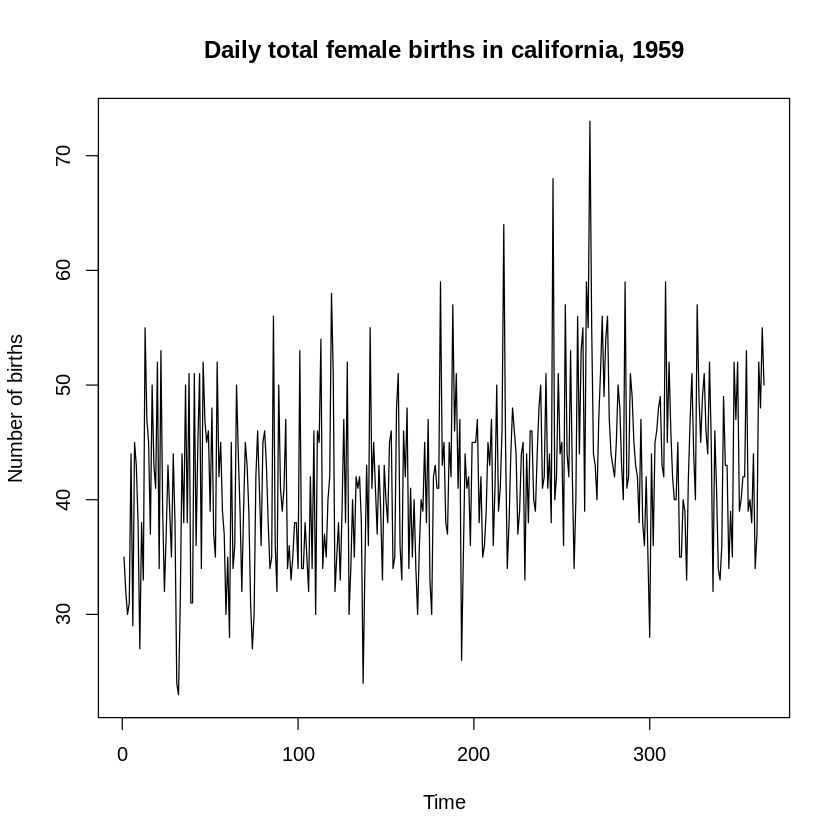

In [6]:
plot.ts(number_of_births,main='Daily total female births in california, 1959', ylab = 'Number of births')

=> 약간 상승하다 하락하는 것 같은 트렌드가 보임

In [7]:
# Q-statistics로 서로다른 lag간에 autocorrelation이 있는지 확인

Box.test(number_of_births, lag = log(length(number_of_births)))


	Box-Pierce test

data:  number_of_births
X-squared = 36.391, df = 5.8999, p-value = 2.088e-06


=> p값이 충분히 작기 때문에 귀무가설 기각. autocorrelation이 어딘가에 있음. <br>
=> 즉, 파라미터를 찾아서 모형 만들 수 있음

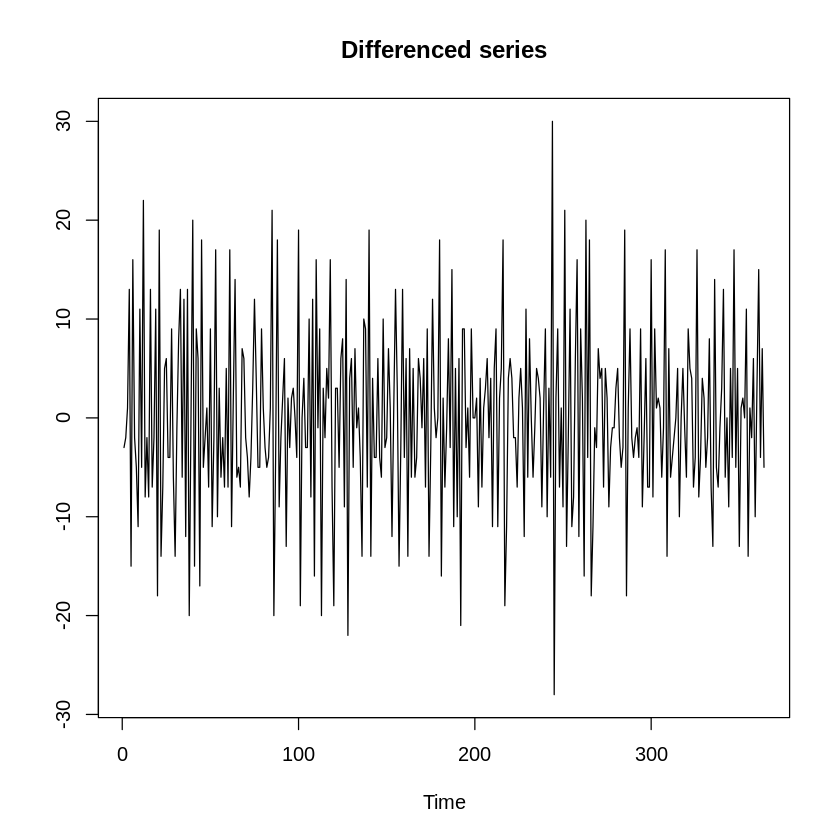

In [8]:
# 1차 차분 후 그래프 확인

plot.ts(diff(number_of_births), main='Differenced series', ylab = '')

=> stationary

In [9]:
# 1차 차분 후 다시 Q-statistics 확인

Box.test(diff(number_of_births), lag = log(length(diff(number_of_births))))


	Box-Pierce test

data:  diff(number_of_births)
X-squared = 78.094, df = 5.8972, p-value = 7.661e-15


=> p값 매우 작아서 autocorrelation이 있음

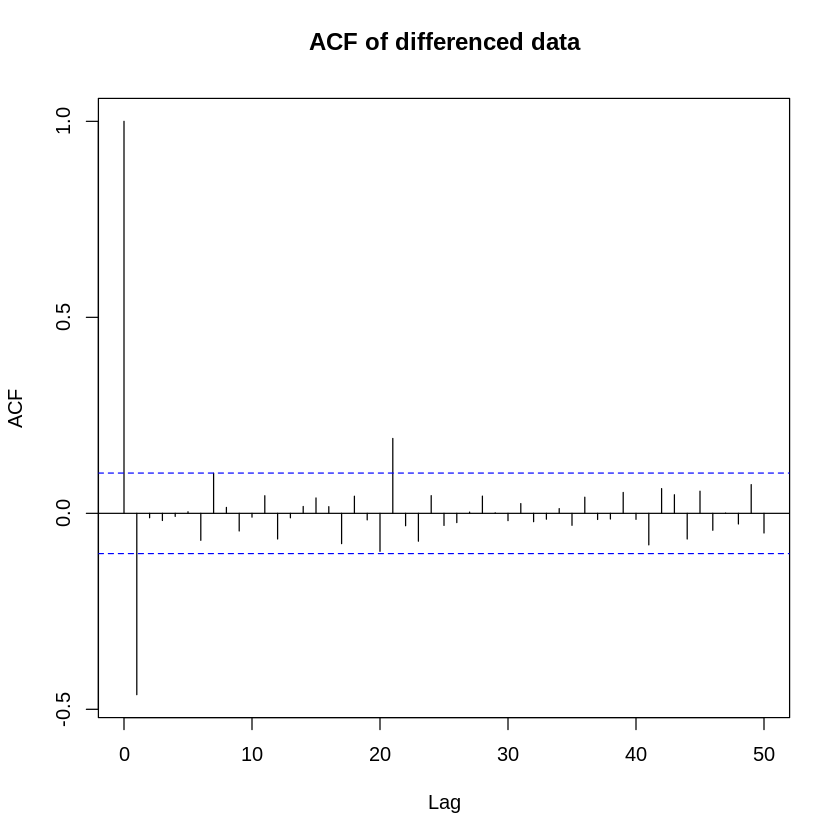

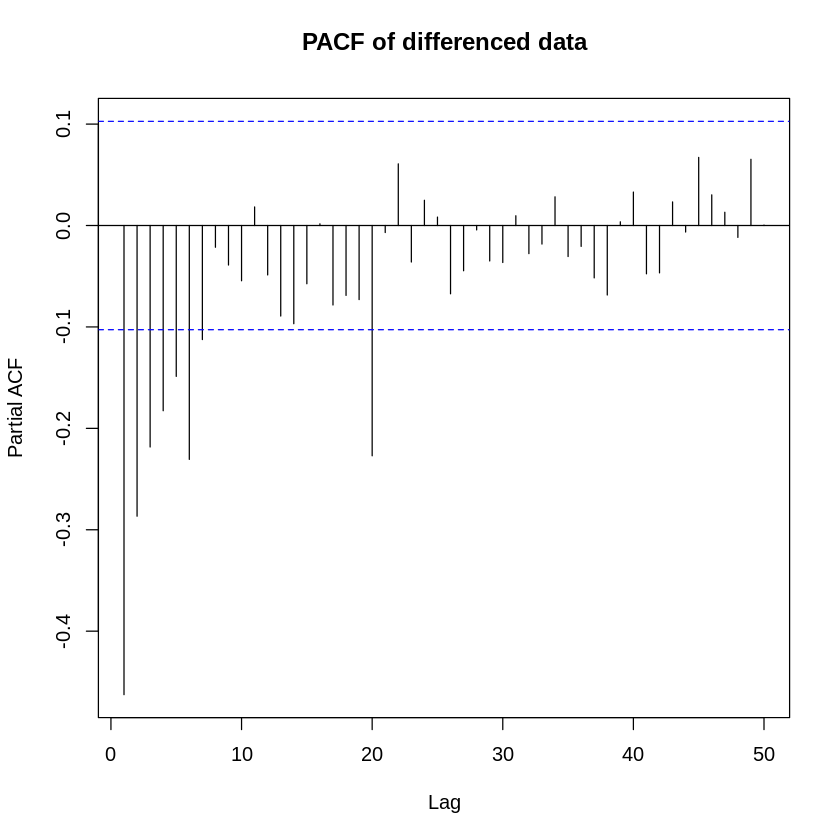

In [10]:
# 1차 차분한 데이터의 ACF, PACF

acf(diff(number_of_births), main='ACF of differenced data', 50)
pacf(diff(number_of_births), main='PACF of differenced data', 50)

- ACF : possible q=1,21 (=> parsimony principle(검약의 원칙)을 고려하면 1 선택)
- PACF : possible p=1,2,3,4,5,6,7,21 (=> parsimony principle(검약의 원칙)을 고려하면 21 제외)

In [11]:
# 여러 ARIMA 모델들 fit 해보기

model1<-arima(number_of_births, order=c(0,1,1))
SSE1<-sum(model1$residuals^2)
model1.test<-Box.test(model1$residuals, lag = log(length(model1$residuals)))

model2<-arima(number_of_births, order=c(0,1,2))
SSE2<-sum(model2$residuals^2)
model2.test<-Box.test(model2$residuals, lag = log(length(model2$residuals)))

model3<-arima(number_of_births, order=c(7,1,1))
SSE3<-sum(model3$residuals^2)
model3.test<-Box.test(model3$residuals, lag = log(length(model3$residuals)))

model4<-arima(number_of_births, order=c(7,1,2))
SSE4<-sum(model4$residuals^2)
model4.test<-Box.test(model4$residuals, lag = log(length(model4$residuals)))

# 각 모델의 결과값 데이터프레임으로 만들기
df<-data.frame(row.names=c('AIC', 'SSE', 'p-value'), 
               c(model1$aic, SSE1, model1.test$p.value), 
               c(model2$aic, SSE2, model2.test$p.value), 
               c(model3$aic, SSE3, model3.test$p.value),
               c(model4$aic, SSE4, model4.test$p.value))
colnames(df)<-c('Arima(0,1,1)','Arima(0,1,2)', 'Arima(7,1,1)', 'Arima(7,1,2)')

format(df, scientific=FALSE) # scientific=FALSE : 지수숫자표기x 

,"Arima(0,1,1)","Arima(0,1,2)","Arima(7,1,1)","Arima(7,1,2)"
,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
AIC,2462.2207021,2459.5705306,2464.8827225,2466.6664136
SSE,18148.4561632,17914.6513437,17584.3902548,17574.0578107
p-value,0.5333604,0.9859227,0.9999899,0.9999929


=> ARIMA(0,1,2)에서 AIC 최소 <br>
=> ARIMA(7,1,2)에서 SSE 최소 <br>

In [15]:
install.packages("sarima")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘PolynomF’, ‘Formula’, ‘lagged’, ‘Rcpp’, ‘Rdpack’, ‘numDeriv’, ‘ltsa’, ‘RcppArmadillo’




In [ ]:
# SARIMA 모델로 fit 해보기

sarima(number_of_births, 0,1,2,0,0,0) # ARIMA(0,1,2)

## 모델 도출 

In [22]:
arima(number_of_births, order=c(0,1,2))


Call:
arima(x = number_of_births, order = c(0, 1, 2))

Coefficients:
          ma1      ma2
      -0.8478  -0.1079
s.e.   0.0497   0.0496

sigma^2 estimated as 49.22:  log likelihood = -1226.79,  aic = 2459.57

- $Y_t=diff(\text{number_of_births})$일 때, $Y_t$의 fitted model: 
$$Y_t=Z_t-0.8478Z_{t-1}-0.1079Z_{t-2} \ \text{ and } \ \sigma_Z^2=49.22$$

- $X_t=\text{number_of_births}$일 때, $X_t$의 fitted model: 
$$(1-B)X_t=Z_t-0.8478Z_{t-1}-0.1079Z_{t-2} \ \text{ and } \ \sigma_Z^2=49.22$$
$$\text{or}$$
$$\nabla X_t=Z_t-0.8478Z_{t-1}-0.1079Z_{t-2} \ \text{ and } \ \sigma_Z^2=49.22$$
$$\text{or}$$
$$X_t=X_{t-1}+Z_t-0.8478Z_{t-1}-0.1079Z_{t-2} \text{ and } \ \sigma_Z^2=49.22$$